# Titanic survivor

## Step1- Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step2- Retrieve the Data

In [2]:
titanic = pd.read_csv('titanic-Dataset.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step3- Exploratory Data Analysis

Let's begin some exploratory data analysis!



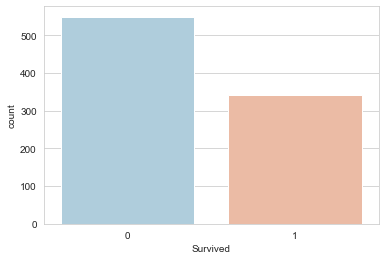

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='RdBu_r')

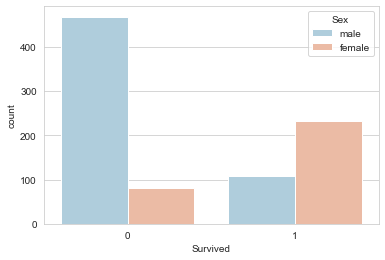

In [5]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

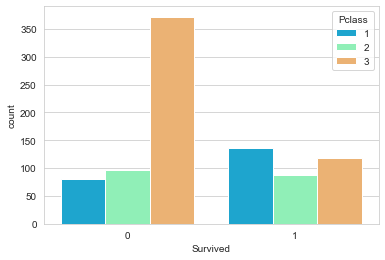

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

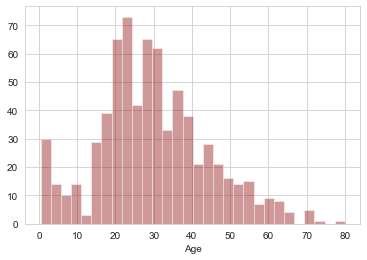

In [7]:
sns.distplot(titanic['Age'],kde=False,color='darkred',bins=30)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


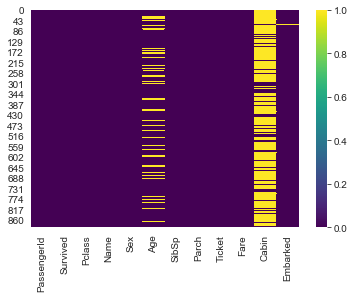

In [9]:
sns.heatmap(titanic.isnull(),cmap='viridis')#,yticklabels=False,cbar=False

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


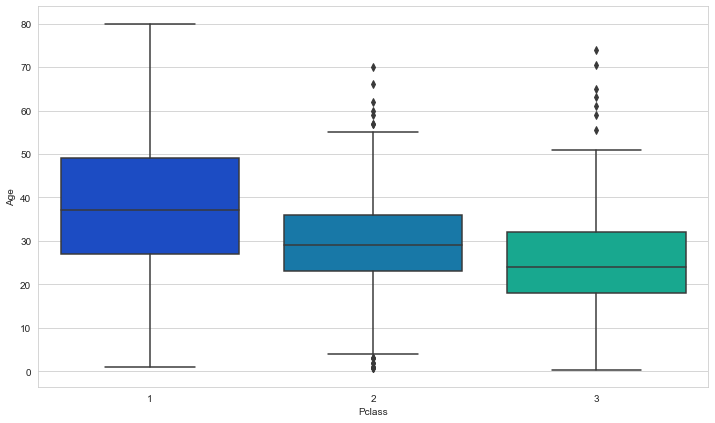

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [12]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

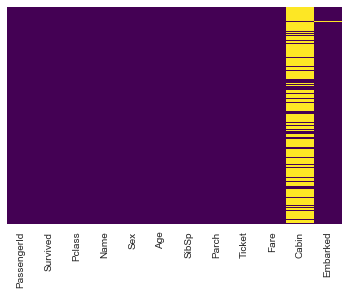

In [13]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [14]:
titanic.drop('Cabin',axis=1,inplace=True)

In [15]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [16]:
titanic.dropna(inplace=True)

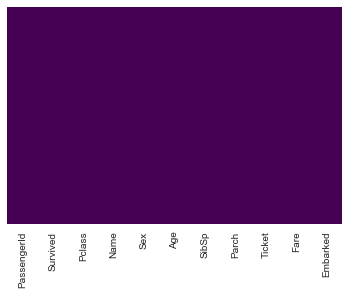

In [17]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [20]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]


In [21]:
pd.get_dummies(titanic['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [22]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

## Step4- Preparing the data into train and test 

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

In [29]:
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
807          808       3  18.0      0      0   7.7750     0  0  1
651          652       2  18.0      0      1  23.0000     0  0  1
2              3       3  26.0      0      0   7.9250     0  0  1
690          691       1  31.0      1      0  57.0000     1  0  1
196          197       3  24.0      0      0   7.7500     1  1  0
..           ...     ...   ...    ...    ...      ...   ... .. ..
576          577       2  34.0      0      0  13.0000     0  0  1
840          841       3  20.0      0      0   7.9250     1  0  1
338          339       3  45.0      0      0   8.0500     1  0  1
524          525       3  24.0      0      0   7.2292     1  0  0
865          866       2  42.0      0      0  13.0000     0  0  1

[622 rows x 9 columns]


## Step 5- Build a Logistic Regression model for classification

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(solver='liblinear')

## Step 6- Train the model

In [32]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

Let's move on to evaluate our model!

## Step7- Evaluation

In [33]:
predictions = logmodel.predict(X_test)

We can check precision,recall,f1-score using classification report!

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [35]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix:\n', confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn,fp,fn,tp)

Confusion matrix:
 [[151  12]
 [ 36  68]]
151 12 36 68


C:\Users\mdpfayro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


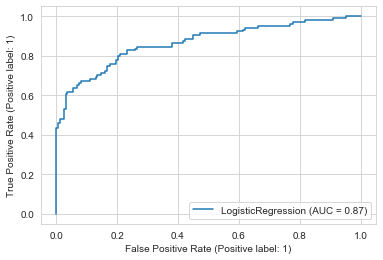

In [37]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logmodel, X_test, y_test)
plt.show()

In [41]:
data=[[182,1,2.0,0,2,75,1,0,1]]
df=pd.DataFrame(data,columns=['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S'])
logmodel.predict(df)


array([1], dtype=int64)